In [95]:
import numpy as np
import os 
import pandas as pd
import plotly.express as px
import re
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [96]:
def plot_embedding_interactive_bis(array_emb, df_annot, 
                                   labels_name = None, 
                                   second_labels_name = None, 
                                   labels_text = None, 
                                   show_text = False, 
                                   title = None, 
                                   color_palette = None,
                                   fontsize = 10,
                                   width = 800, 
                                   height = 700):
    """ Function to plot interactive projections (exemple of methods : PCA, KPCA, MDS, TSNE, Umap, IsoMap)  
    Parameters : 
        array_emb : array, containing the embedding (initial data that are flatten)
        df_annot : dataframe, containing the annotation of data 
        labels_name : str, label that exists in the 'df_annot' for coloring the data 
        show_text : boolean, if True will show the labels given in the 'labels_text" 
        labels_text : list, list of labels to plot in the projection 
        title : str
        color_palette : dict, personnalized palette for color data 
        fontsize : int, size of title 
        width, heigth : int : dimension of the plot 
    Returns : 
        plt : plotly object, resulting plotly plot 
    """
    df_merge = pd.DataFrame(array_emb).merge(df_annot, left_index = True, right_index = True)  
    #print(df_annot.columns)
    #print(df_merge)

    # plot the projection 
    plt = px.scatter(df_merge,x=0,y=1,color=df_merge[labels_name],color_discrete_map=color_palette,  
                     color_continuous_scale = "Turbo",
                     hover_name=labels_name, 
                     hover_data=df_annot.columns,
                     width=width, height=height)
    
    # center title and add labels text 
    plt.update_layout(title_text=title, title_x=0.5, font_size=fontsize) 
    if show_text and (not (labels_text is None)):
        if (second_labels_name is None):
            texts = df_annot.loc[df_annot[labels_name].isin(labels_text)]
            labels_idx = texts.index
            #print(texts)
            for i in labels_idx: 
                plt.add_annotation(x=df_merge.loc[i,0], y=df_merge.loc[i,1],
                            text=texts.loc[i, labels_name],
                            showarrow=True,
                            arrowhead=1)
            plt.update_traces(textposition='top right')
        else: 
            texts = df_annot.loc[df_annot[second_labels_name].isin(labels_text)] 
            labels_idx = texts.index 
            for i in labels_idx: 
                plt.add_annotation(x=df_merge.loc[i,0], y = df_merge.loc[i,1], 
                                   text = texts.loc[i, second_labels_name],
                                   showarrow=True, 
                                   arrowhead=1) 
            plt.update_traces(textposition='top right') 
    plt.update_yaxes(scaleanchor = "x", scaleratio = 1)

    return plt

In [130]:
def pssm_matrix_into_array(repertory_path):
    """
    Construct PSSM matrix from .aamtx files.
    .aamtx file :  the AA distribution profil of each position of a sequence.
    Parameters : 
        repertory_path : str, the path of repertory containing the ".aamtx" files" 
    Returns : 
        protein_mat : list, containing probabilities of each AA, at each position for each sequence, as array
    """
    # count the total number of ".aamtx" files 
    nb_aamtx = len([filename for filename in os.listdir(repertory_path)  if re.search("\.aamtx", filename)])
    print(nb_aamtx)
    
    # read ".aamtx" files, flatten the content and append into a list
    protein_mat = [] 
    for i in range(1, nb_aamtx): 
        protein = pd.read_csv(repertory_path + "/"+str(i)+".aamtx" , header= None, sep =' ')
        protein = protein.loc[:,'0':'19'] 
        protein = np.asarray(protein) 
        protein = protein.flatten().T 
        protein_mat.append(protein) 
        
    protein_mat = np.asarray(protein_mat,) 
    protein_mat = pd.DataFrame(protein_mat) 
        

    return protein_mat

In [98]:
# classify species (from thioredoxin annotation file) into different kingdom 
bacteria_specie = ["Bacteria", "LBCA", "LGPCA",  "LPBCA", "Salmonella", "Shigella", "Escherichia", "Acidobacteria", "Deinococcus", "Thermus", 
                    "Solibacter", "Helicobacter", "Geobacter", "Wolinella", "Neisseria", "Bordetella", "Brucella", "Rickettsia", "Campylobacter",
                   "Thiobacillus", "Burkholderia", "Vibrio",  "Desulfovibrio", "Bdellovibrio", "Yersinia", "Agrobacterium", "Actinobacteria", "Thermobifida",
                   "Flavobacterium","Geobacterium", "Chloroflexus", "Aquifex", "Enterococcus","Chlamydia", "Chlamydophila", "Listeria", "Lactobacillus",
                   "Geobacillus",  "Chlorobium",  "Rhodopirrelula", "Clostridium", "Hyperthermus", "Porphyromonas", "Streptomyces", 
                   "Syneschocystis", "Nostoc", "Thermosynechococus", "Prochlorococcus", "Nostoc1", "Sinorhizobium", "Pseudomonas", "Bacteroides", "Staphylococcus", 
                   "Thermoanaerobacter","Bacillus", "Mycobacterium", "Streptococcus", "Dehalococcoides", "Synechocystis", "Corynebacterium", "Thermosynechococcus",
                   "Rhodopirellula"]
archae_specie = ["Archaea", "LACA", "Aeropyrum","Thermofilum","Caldivirga","Sulfolobus","Haloquadratum","Haloarcula", "Thermoplasma", "Hyperthermus",
                 "Natronomonas","Methanocorpusculum", "Methanococcus", "Halobacterium", "Picrophilus","Methanospirillum","Staphylothermus",
                  "Methanosaeta", "Metallosphaera","Methanococcoides", "Candidatus","Archaeoglobus"]

eukaryota_animal= ["Eukaryota", "LECA", "LAFCA", "Ovis","Bos", "Mus","Rattus","Rabit", "Human", "Ponab","Macmu","Ornithorhynchus","Gallus","Equus",
                    "Theileria","Danio","Tetraodon","Xenopus","Ictalurus","Ophiophagus","Callithrix","Monodelphis","Geocy","Sus","Melopsittacus", # animal
                    "Monosiga", # choanoflagellata
                    "Graphocephala", "Tribolium", "Apis", "Bombyx","Litopenaeus","Drosophila", # insecta
                    "Entamoeba", "Plasmodium","Cryptosporidium", "Dictyostelium"  # unicellular parasite
                  ]
                                       
eukaryota_viridiplantae = ["Helicosporidium", "Ostreococcus", "Fagopyrum"]
eukaryota_mitochondrion = ["Bovin Mitochondrio", "Homo Mitochondrion",  "Rattus Mitochondrio", "Mus Mitochondrion"] 
eukaryota_chloroplast = ["Brana Chloroplast", "Pisum Chloroplast",  "Wheat Chloroplast", "Pea Chloroplast", "Spiol Chloroplast", "Arabidopsis"] 
eukaryota_fungi = ["Pichia", "Candida", "Aspergillus", "Kluyveromyces", "Saccharomyces","Schizosaccharomyces","Neosartorya"] 


# construction of palette 
trx_palette = {"OTHERS" : "#c7c7c7", "EUKARYOTA" : "#31955d", "CHLOROPLAST" : "#06f9d4", "MITOCHONDRION" : "#3ff100" , "root": "#000000", "AECA" : "#e7e53c",
               "Zea": "#c7c7c7", "Vitis":"#c7c7c7", "Limonium": "#c7c7c7"} 
trx_palette.update(dict.fromkeys(eukaryota_animal,"#21e548"))
trx_palette.update(dict.fromkeys(eukaryota_viridiplantae,"#b5e521"))
trx_palette.update(dict.fromkeys(eukaryota_mitochondrion, "#61ff06"))
trx_palette.update(dict.fromkeys(eukaryota_chloroplast,"#06f9d4"))
trx_palette.update(dict.fromkeys(eukaryota_fungi,"#1fb995"))
trx_palette.update(dict.fromkeys(bacteria_specie,"#34b8e7"))
trx_palette.update(dict.fromkeys(archae_specie, "#ff0000"))


# Data

In [99]:
repertory_path = "/home/lavande/ren/PoincareMSA/examples/thioredoxins/fasta0.9/" # path that contains the .aamtx files
thioredoxin_mat = pssm_matrix_into_array(repertory_path) # thioredoxin PSSM matrix
thioredoxin_color = pd.read_csv("./data/annotation_new.csv") # thioredoxin annotation matrix 

# rename the first unnamed column to 'proteins_id' 
thioredoxin_color.rename(columns={'Unnamed: 0': 'proteins_id'}, inplace=True)
thioredoxin_color["proteins_id"] = thioredoxin_color["proteins_id"].astype(str)

211


In [100]:
thioredoxin_mat

,0,1,2,3,4,5,6,7,8,9,...,7790,7791,7792,7793,7794,7795,7796,7797,7798,7799
0,0.0716,0.0078,0.0730,0.0677,0.0794,0.0286,0.0352,0.0208,0.0677,0.0195,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
1,0.0716,0.0078,0.0730,0.0677,0.0794,0.0286,0.0352,0.0208,0.0677,0.0195,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
2,0.0716,0.0078,0.0730,0.0677,0.0794,0.0286,0.0352,0.0208,0.0677,0.0195,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
3,0.0716,0.0078,0.0730,0.0677,0.0794,0.0286,0.0352,0.0208,0.0677,0.0195,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
4,0.0716,0.0078,0.0730,0.0677,0.0794,0.0286,0.0352,0.0208,0.0677,0.0195,...,0.0736,0.0604,0.0536,1.8651,0.1072,0.0668,0.0872,0.0132,0.0736,0.0268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.1705,0.0340,0.0684,0.0512,0.0512,0.1365,0.2557,0.0340,0.0852,1.4707,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
206,0.1705,0.0340,0.0684,0.0512,0.0512,0.1365,0.2557,0.0340,0.0852,1.4707,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
207,0.1705,0.0340,0.0684,0.0512,0.0512,0.1365,0.2557,0.0340,0.0852,1.4707,...,0.0652,0.0469,0.0378,0.0574,0.0638,0.0442,0.0521,0.0105,0.0456,0.0274
208,0.1705,0.0340,0.0684,0.0512,0.0512,0.1365,0.2557,0.0340,0.0852,1.4707,...,0.0859,0.1318,0.0802,0.0916,1.4477,0.0916,0.2351,0.0114,0.0916,0.0403


In [101]:
# All data 
X_complet=StandardScaler(with_std=False).fit_transform(thioredoxin_mat)

## PCA

In [102]:
pca=decomposition.PCA()
X_PCA_c= pca.fit(X_complet).transform(X_complet)

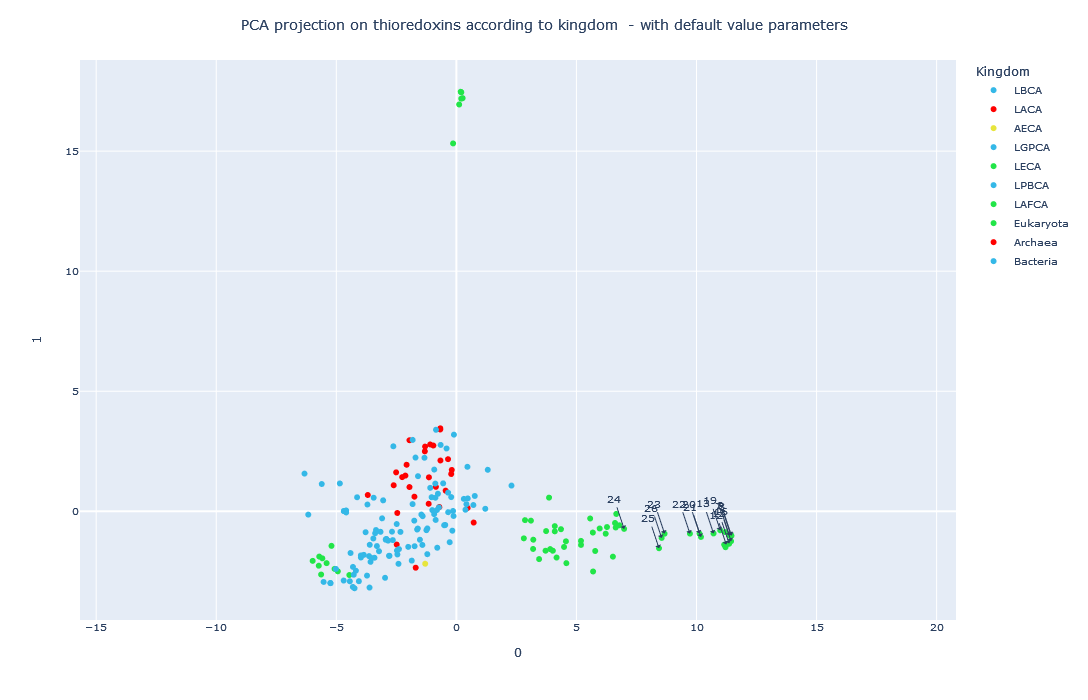

In [103]:
pca_trace= plot_embedding_interactive_bis(array_emb = X_PCA_c, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Kingdom", 
                               second_labels_name = "proteins_id",
                               #labels_text = ['49','50'], # amoebozoa
                               labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['18', '186','187', '188', '190'], # eukaryotic mitochondrion
                               #labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "PCA projection on thioredoxins according to kingdom  - with default value parameters",
                               color_palette = trx_palette)
pca_trace.show()

## KPCA

In [104]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(kernel='cosine')
X_transformed = transformer.fit_transform(X_complet)

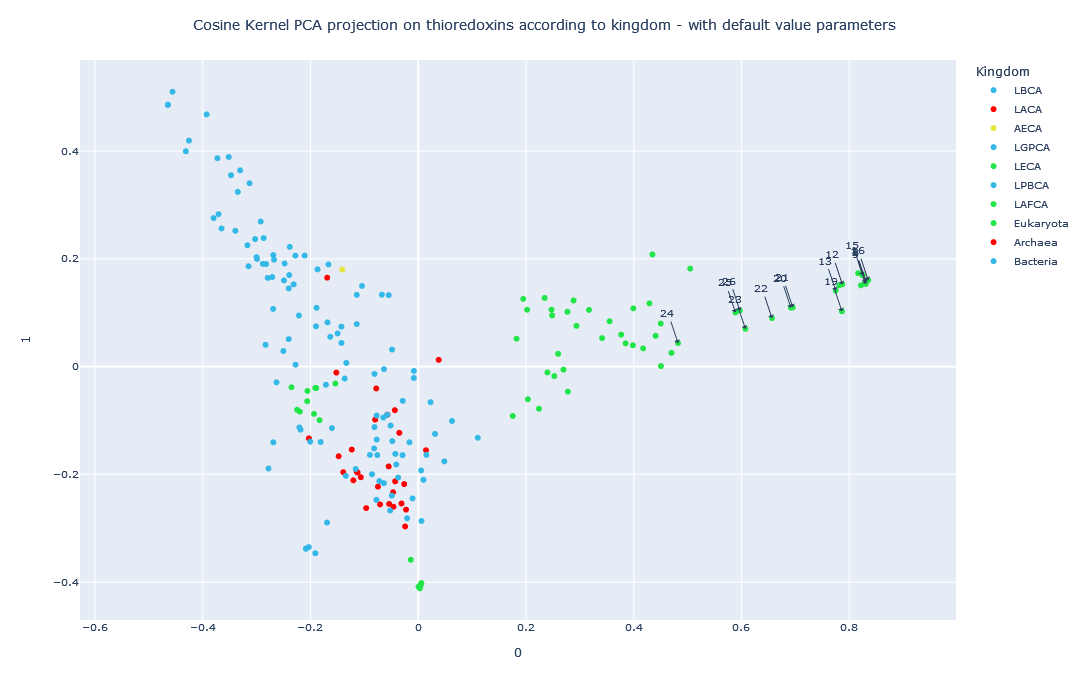

In [107]:
kpca_trace= plot_embedding_interactive_bis(array_emb = X_transformed, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Kingdom", 
                               second_labels_name = "proteins_id", 
                               labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               #labels_text = ['18', '186','187', '188', '190'], # eukaryotic mitochondrion
                               #labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "Cosine Kernel PCA projection on thioredoxins according to kingdom - with default value parameters",
                               color_palette = trx_palette) 

kpca_trace.show()

## MDS

In [109]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

X_cosine= pairwise_distances(X_complet,metric='cosine')
mds_nonmetric = MDS(n_components=2,metric=True,dissimilarity='precomputed', random_state = 42)
X_m_c_t = mds_nonmetric.fit_transform(X_cosine)

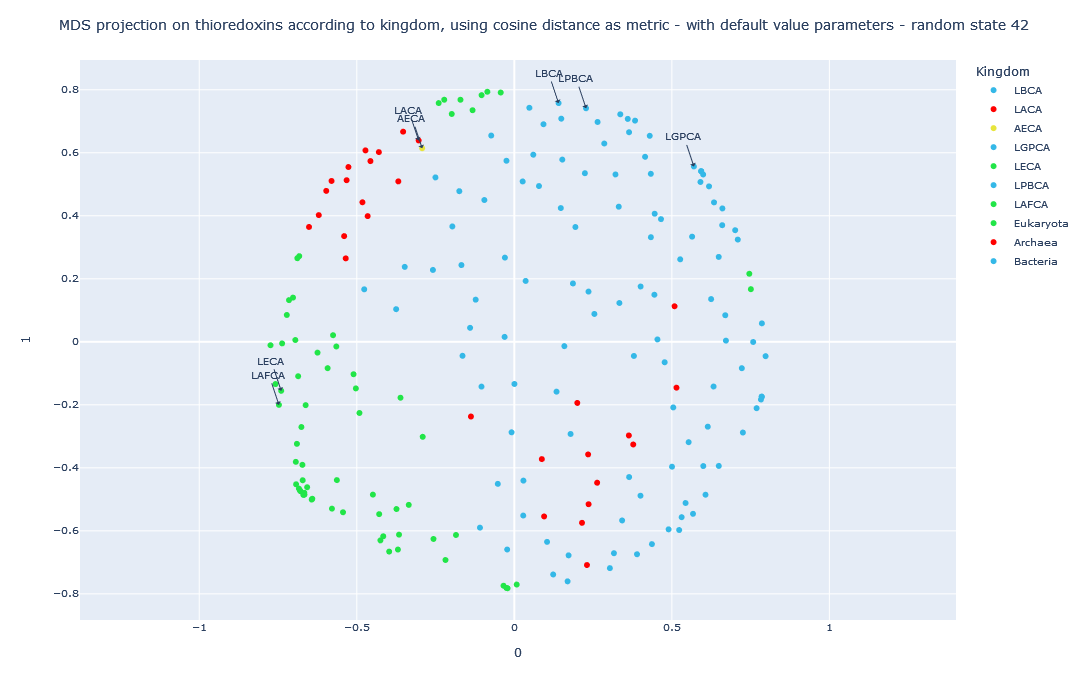

In [110]:
mds_trace= plot_embedding_interactive_bis(array_emb = X_m_c_t, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Kingdom", 
                               #second_labels_name = "proteins_id", 
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['18', '186','187', '188', '190'], # eukaryotic mitochondrion
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "MDS projection on thioredoxins according to kingdom, using cosine distance as metric - with default value parameters - random state 42",
                               color_palette = trx_palette, 
                               fontsize = 10)
mds_trace.show()

## TSNE

In [111]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, random_state = 42).fit_transform(X_complet)

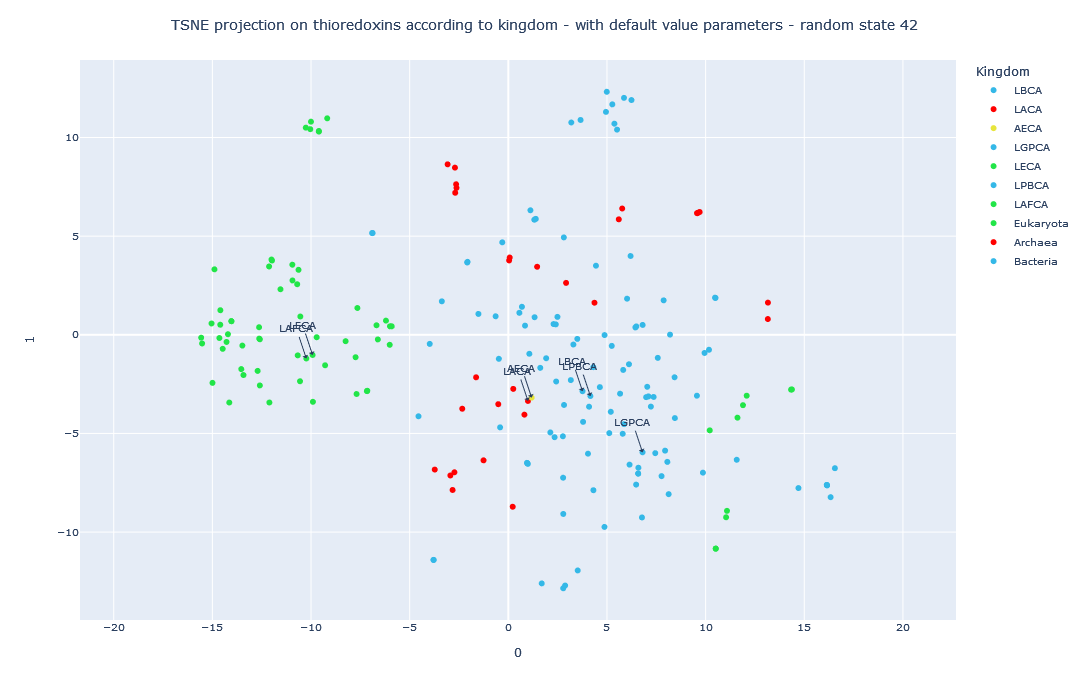

In [114]:
tsne_trace= plot_embedding_interactive_bis(array_emb = X_embedded, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Kingdom", 
                               #second_labels_name = "proteins_id", 
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['18', '186','187', '188', '190'], # eukaryotic mitochondrion
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "TSNE projection on thioredoxins according to kingdom - with default value parameters - random state 42",
                               color_palette = trx_palette) 
tsne_trace.show()

## UMAP

In [29]:
import umap

reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X_complet)

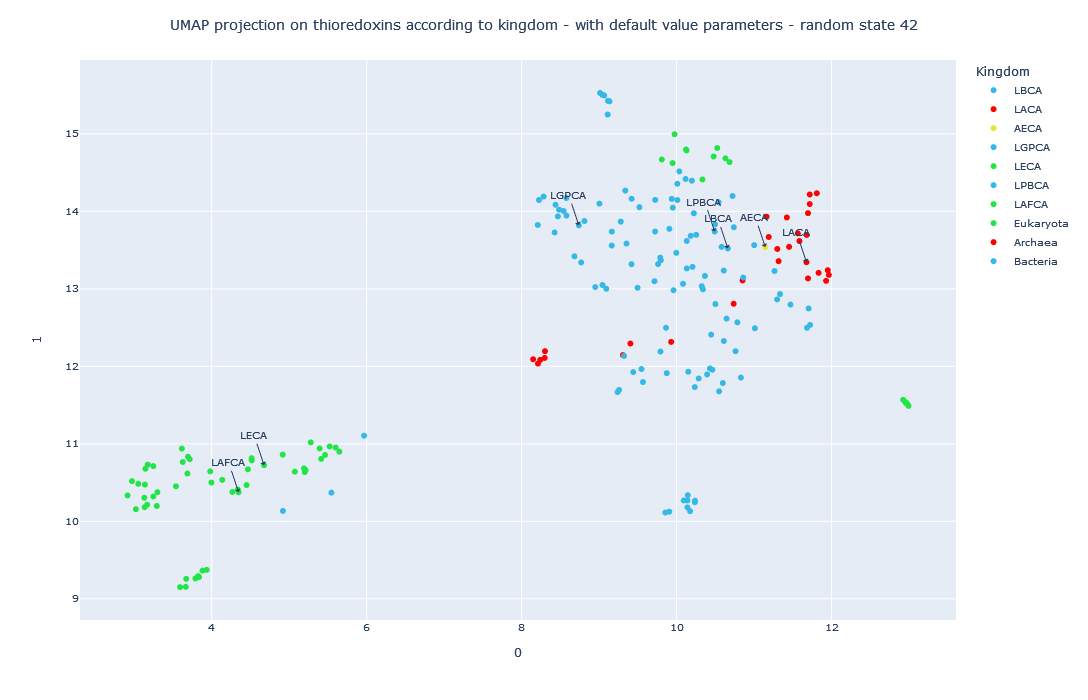

In [115]:
umap_trace= plot_embedding_interactive_bis(array_emb = embedding, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Kingdom", 
                               #second_labels_name = "proteins_id", 
                               #second_labels_name = "Family",
                               #labels_text = ["Amoebozoa"],
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['18', '186','187', '188', '190'], # eukaryotic mitochondrion
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "UMAP projection on thioredoxins according to kingdom - with default value parameters - random state 42",
                               color_palette = trx_palette) 
umap_trace.show()

## IsoMap

In [116]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
df_iso = iso.fit_transform(X_complet)

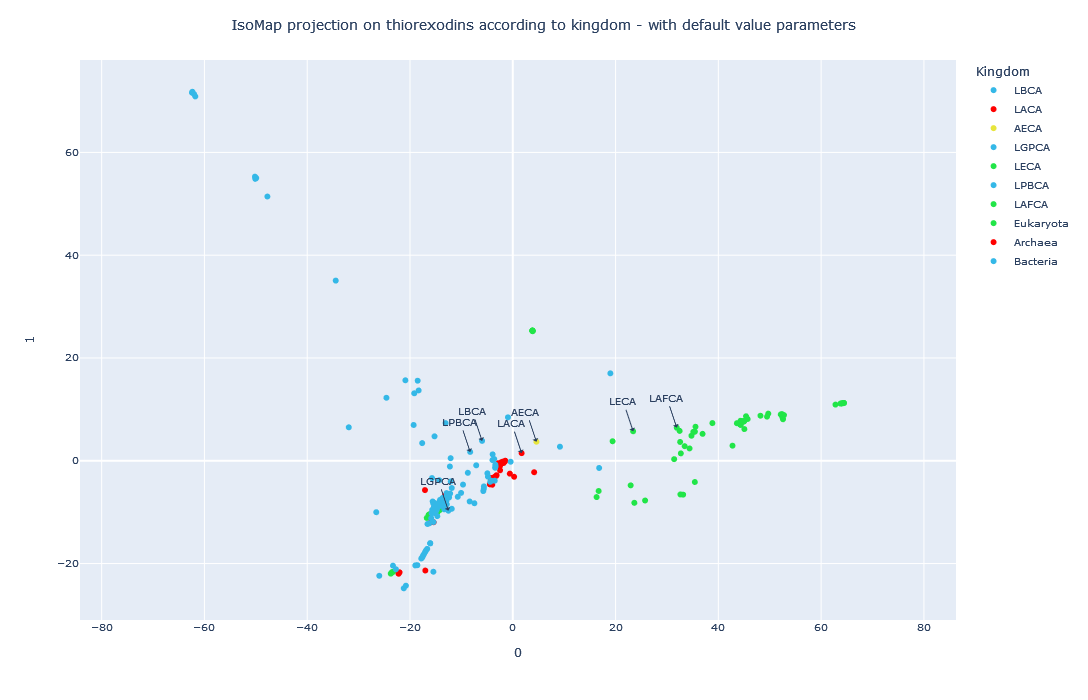

In [119]:
iso_trace= plot_embedding_interactive_bis(array_emb = df_iso, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Kingdom", 
                               #second_labels_name = "proteins_id", 
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['51','52', '154', '155','156', '157', '158'], # eukaryotic chloroplast
                               #labels_text = ['18', '186','187', '188', '190'], # eukaryotic mitochondrion
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "IsoMap projection on thiorexodins according to kingdom - with default value parameters",
                               color_palette = trx_palette)
iso_trace.show()

# Globins0.9 - by Species

## PCA

In [55]:
pca=decomposition.PCA()
X_PCA_c= pca.fit(X_complet).transform(X_complet)

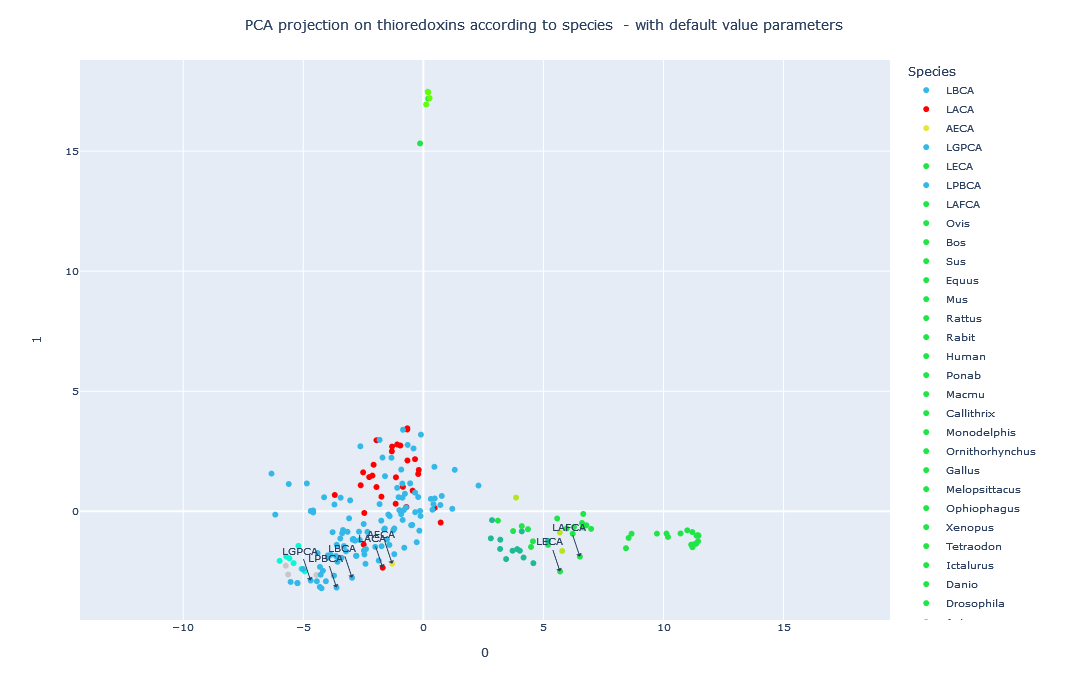

In [120]:
pca_trace= plot_embedding_interactive_bis(array_emb = X_PCA_c, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Species", 
                               #second_labels_name = "proteins_id", 
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "PCA projection on thioredoxins according to species  - with default value parameters",
                               color_palette = trx_palette)
pca_trace.show()

## KPCA

In [121]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(kernel='cosine')

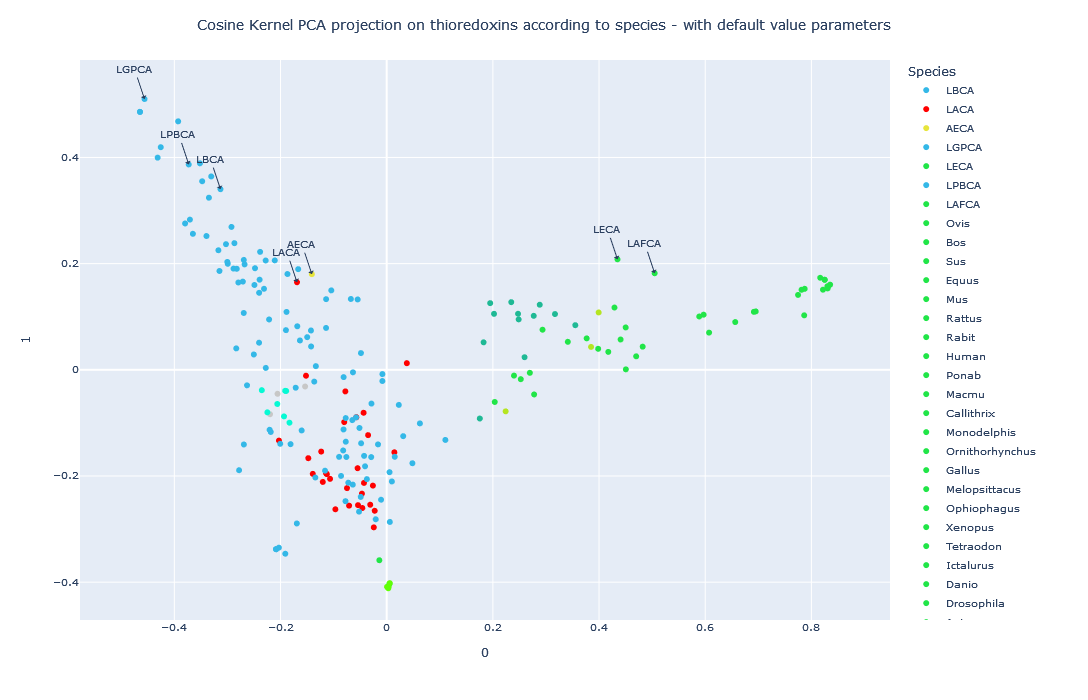

In [122]:
X_transformed = transformer.fit_transform(X_complet)
kpca_trace= plot_embedding_interactive_bis(array_emb = X_transformed, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Species", 
                               #second_labels_name = "proteins_id",
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "Cosine Kernel PCA projection on thioredoxins according to species - with default value parameters",
                               color_palette = trx_palette) 

kpca_trace.show()

## MDS

In [123]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

X_cosine= pairwise_distances(X_complet,metric='cosine')
mds_nonmetric = MDS(n_components=2,metric=True,dissimilarity='precomputed', random_state = 42)
X_m_c_t = mds_nonmetric.fit_transform(X_cosine)

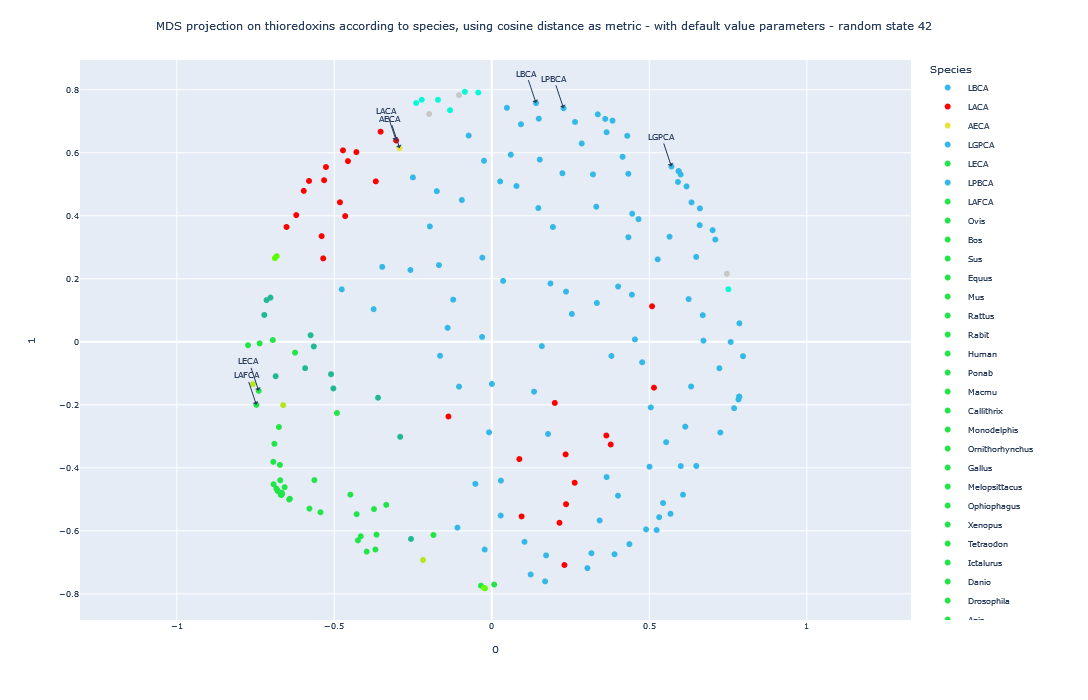

In [124]:
mds_trace= plot_embedding_interactive_bis(array_emb = X_m_c_t, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Species", 
                               #second_labels_name = "proteins_id",
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria<
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "MDS projection on thioredoxins according to species, using cosine distance as metric - with default value parameters - random state 42",
                               color_palette = trx_palette, 
                               fontsize = 8)
mds_trace.show()

## TSNE

In [125]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, random_state = 42).fit_transform(X_complet)

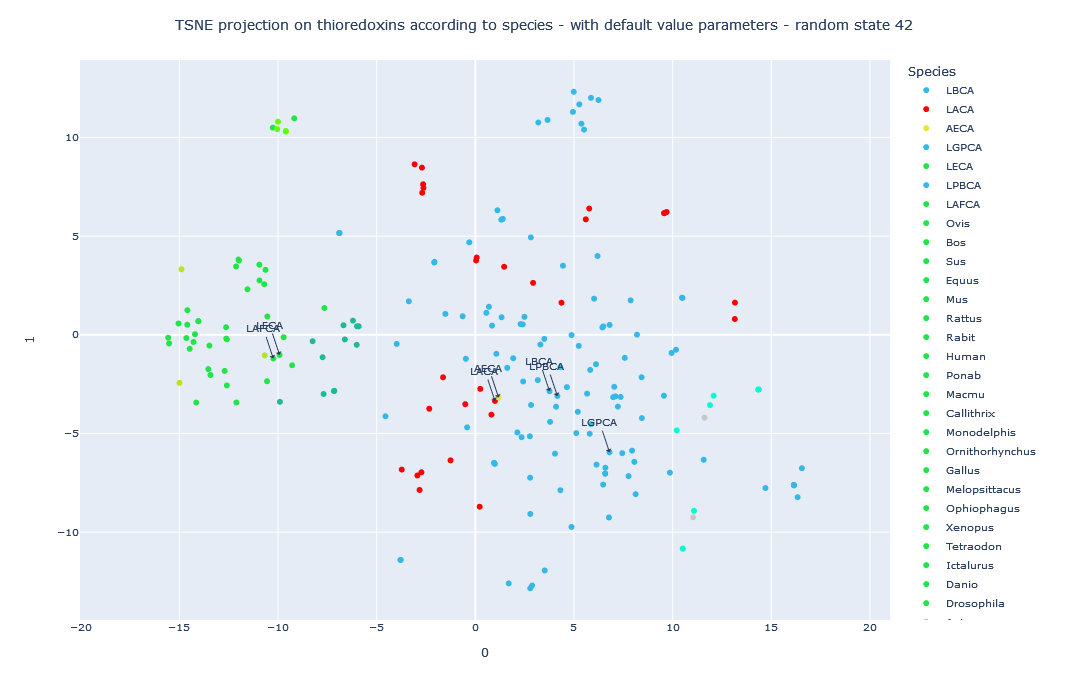

In [126]:
tsne_trace= plot_embedding_interactive_bis(array_emb = X_embedded, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Species", 
                               #second_labels_name = "proteins_id",
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['23', '24', '25', '26','49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "TSNE projection on thioredoxins according to species - with default value parameters - random state 42",
                               color_palette = trx_palette) 

tsne_trace.show()

## UMAP

In [83]:
import umap

reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X_complet)

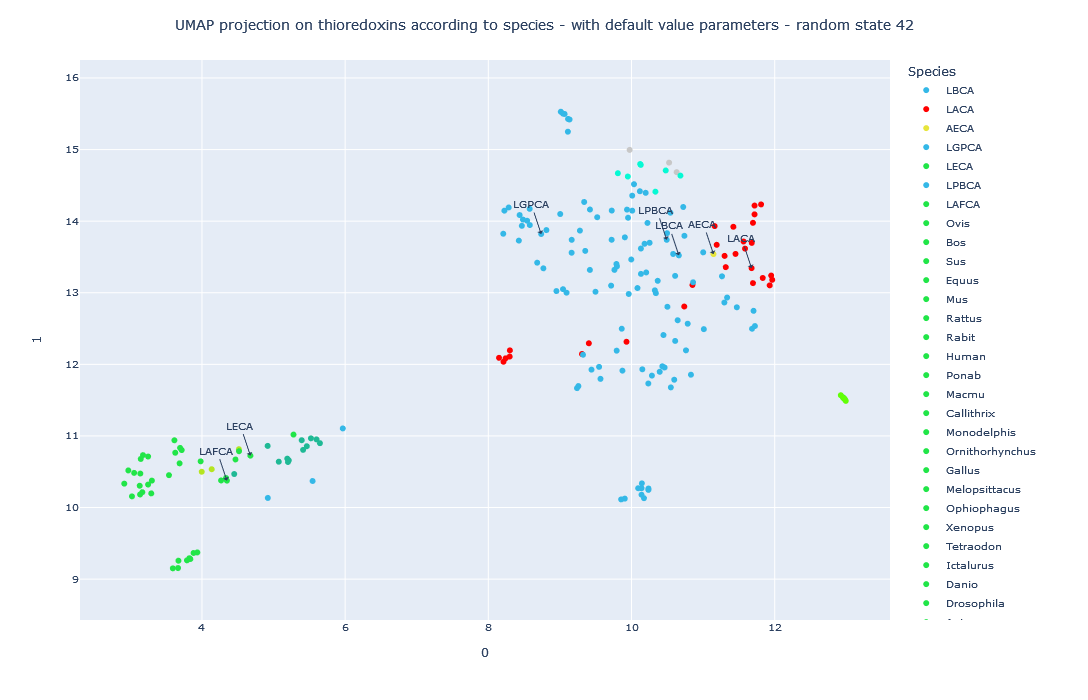

In [127]:
umap_trace= plot_embedding_interactive_bis(array_emb = embedding, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Species", 
                               #second_labels_name = "proteins_id",
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "UMAP projection on thioredoxins according to species - with default value parameters - random state 42",
                               color_palette = trx_palette) 
umap_trace.show()

## IsoMap

In [128]:
from sklearn.manifold import Isomap
iso = Isomap()
df_iso = iso.fit_transform(X_complet)

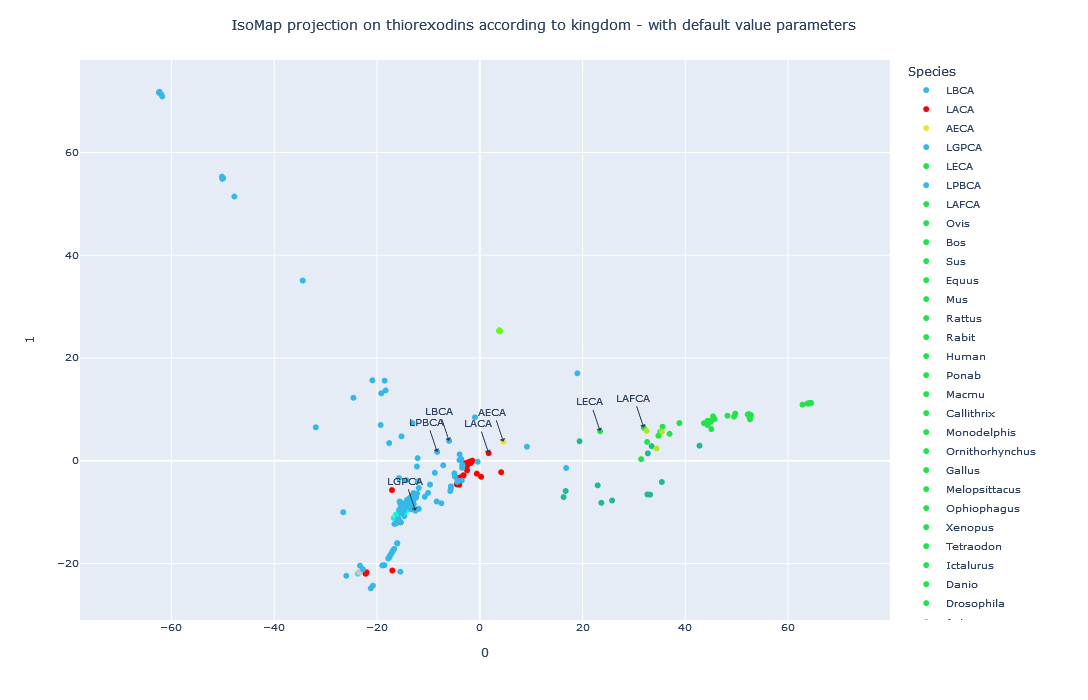

In [129]:
iso_trace= plot_embedding_interactive_bis(array_emb = df_iso, df_annot = thioredoxin_color, 
                               show_text = True,
                               labels_name = "Species", 
                               #second_labels_name = "proteins_id",
                               #labels_text = ['7', '8', '9', '12', '13', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26'], # metazoa
                               #labels_text = ['49','50'], # amoebozoa
                               #labels_text = ['71', '72', '73', '74', '75'], # archaea halobacterial
                               #labels_text = ['27', '28', '29', '32', '33', '24'], # eukaryotic arthropoda
                               #labels_text = ['126', '127', '129', '130', '131', '168', '197'], # proteo-/actinobacteria
                               #labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               labels_text = ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                               title = "IsoMap projection on thiorexodins according to kingdom - with default value parameters",
                               color_palette = trx_palette)
iso_trace.show()